In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Strava

https://zenodo.org/records/15332147

Data from: Spatio-Temporal Graph Neural Network for Urban Spaces: Interpolating Citywide Traffic Volume

Kaiser, S. K., Rodrigues, F., Azevedo Lima, C., & Kaack, L.H. (2025). Spatio-Temporal Graph Neural Network for Urban Spaces: Interpolating Citywide Traffic Volume. [published on arXiv].

Dataset Overview
This dataset includes street-level traffic volume data for two major urban areas:

Berlin (Strava Cycling Data): Daily bicycle traffic volumes from 2019–2023, aggregated from publicly shared Strava user data.

Each city includes:

<City>_data:
Full feature table for each street segment, including traffic volume and auxiliary features.

<City>_graph_geometry:
Geometry for each street segment.

<City>_adjacency_binary:
Binary adjacency matrix.

<City>_adjacency_similarity:
Adjacency matrix weighted by node feature similarity.

<City>_adjacency_distancebird:
Adjacency matrix based on Euclidean (bird’s-eye) distance.

<City>_adjacency_distanceroad:
Adjacency matrix based on real-world road network distance.

<City>_adjacency_distancetime:
Adjacency matrix weighted by estimated travel time over the road network.

Key Features and Methodology
Volume Estimation: Strava volumes are rounded aggregates of bike trips; NYC volumes are computed from reconstructed taxi trajectories.

Filtering: Extreme outliers (e.g., from special events) are filtered per segment to focus on typical traffic conditions.

Auxiliary Features:

Built environment (e.g., speed limits, road types, lane counts)

Points of Interest (e.g., shops, schools, transit stops)

Network connectivity metrics (degree, betweenness, etc.)

Temporal indicators (weekday, holidays, hour, month)

Weather data (sunshine, precipitation, temperature)

Socioeconomic indicators (Berlin only)

Proxy motorized traffic metrics (Berlin only)

See the paper for a complete list of features and detailed methodology.

✔️ If data files already exists locally → load from disk 
✔️ If data files does NOT exist → download from Zenodo (can take some time) → save locally → load
✔️ Works with folders (e.g. data/strava/)

In [2]:
base_url = "https://zenodo.org/records/15332147/files"
base_path = "data/strava"

file_names = [
    "berlin_adjacency_binary",
    "berlin_adjacency_distancebird",
    "berlin_adjacency_distanceroad",
    "berlin_adjacency_distancetime",
    "berlin_adjacency_similarity",
    "berlin_graph_geometry",
    "berlin_data",
]

# Ensure folder exists
os.makedirs(base_path, exist_ok=True)

for name in file_names:
    local_path = os.path.join(base_path, f"{name}.parquet")

    # If file exists — load local
    if os.path.exists(local_path):
        df = pd.read_parquet(local_path)
        print(f"📁 Loaded LOCAL {name}: {df.shape}")

    else:
        # Build remote URL
        url = f"{base_url}/{name}.parquet?download=1"
        print(f"🌐 Downloading {name} from Zenodo...")

        # Load from remote and save locally
        df = pd.read_parquet(url, engine="pyarrow")
        df.to_parquet(local_path)
        print(f"⬇️ Saved {name} to {local_path}")

    # Assign to variable dynamically
    globals()[name] = df

📁 Loaded LOCAL berlin_adjacency_binary: (4958, 4958)
📁 Loaded LOCAL berlin_adjacency_distancebird: (4958, 4958)
📁 Loaded LOCAL berlin_adjacency_distanceroad: (4958, 4958)
📁 Loaded LOCAL berlin_adjacency_distancetime: (4958, 4958)
📁 Loaded LOCAL berlin_adjacency_similarity: (4958, 4958)
📁 Loaded LOCAL berlin_graph_geometry: (4958, 4)
📁 Loaded LOCAL berlin_data: (9053308, 137)


In [3]:
def first_eda(df, df_name, n_columns_display=5):
    print(f"=== {df_name} SUMMARY ===")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1e6:.2f} MB")
    
    print("\nFirst 10 column names:")
    print(list(df.columns[:n_columns_display]))
    display(df.iloc[:5, :n_columns_display])


In [9]:
first_eda(berlin_adjacency_binary, "berlin_adjacency_binary")

first_eda(berlin_adjacency_distancebird, "berlin_adjacency_distancebird")

first_eda(berlin_adjacency_distanceroad, "berlin_adjacency_distanceroad")

first_eda(berlin_adjacency_distancetime, "berlin_adjacency_distancetime")

first_eda(berlin_adjacency_similarity, "berlin_adjacency_similarity")

first_eda(berlin_graph_geometry, "berlin_graph_geometry")


=== berlin_adjacency_binary SUMMARY ===
Shape: 4,958 rows × 4,958 columns
Memory usage: 197.02 MB

First 10 column names:
['streetsegment_3572', 'streetsegment_4649', 'streetsegment_478', 'streetsegment_2586', 'streetsegment_2326']


streetsegment_3572  streetsegment_4649  streetsegment_478  \
streetsegment_3572                 1.0                 0.0                0.0   
streetsegment_4649                 0.0                 1.0                0.0   
streetsegment_478                  0.0                 0.0                1.0   
streetsegment_2586                 0.0                 0.0                0.0   
streetsegment_2326                 0.0                 0.0                0.0   

                    streetsegment_2586  streetsegment_2326  
streetsegment_3572                 0.0                 0.0  
streetsegment_4649                 0.0                 0.0  
streetsegment_478                  0.0                 0.0  
streetsegment_2586                 1.0                 0.0  
streetsegment_2326                 0.0                 1.0

=== berlin_adjacency_distancebird SUMMARY ===
Shape: 4,958 rows × 4,958 columns
Memory usage: 197.02 MB

First 10 column names:
['streetsegment_3572', 'streetsegment_4649', 'streetsegment_478', 'streetsegment_2586', 'streetsegment_2326']


streetsegment_3572  streetsegment_4649  streetsegment_478  \
streetsegment_3572            1.000000            0.675594           0.175608   
streetsegment_4649            0.675594            1.000000           0.182123   
streetsegment_478             0.175608            0.182123           1.000000   
streetsegment_2586            0.101872            0.078702           0.173587   
streetsegment_2326            0.302013            0.372248           0.407038   

                    streetsegment_2586  streetsegment_2326  
streetsegment_3572            0.101872            0.302013  
streetsegment_4649            0.078702            0.372248  
streetsegment_478             0.173587            0.407038  
streetsegment_2586            1.000000            0.095344  
streetsegment_2326            0.095344            1.000000

=== berlin_adjacency_distanceroad SUMMARY ===
Shape: 4,958 rows × 4,958 columns
Memory usage: 197.02 MB

First 10 column names:
['streetsegment_3572', 'streetsegment_4649', 'streetsegment_478', 'streetsegment_2586', 'streetsegment_2326']


streetsegment_3572  streetsegment_4649  streetsegment_478  \
streetsegment_3572            1.000000            0.758500           0.004651   
streetsegment_4649            0.758500            1.000000           0.008340   
streetsegment_478             0.004651            0.008340           1.000000   
streetsegment_2586            0.000051            0.000021           0.004317   
streetsegment_2326            0.103297            0.161142           0.299610   

                    streetsegment_2586  streetsegment_2326  
streetsegment_3572            0.000051            0.103297  
streetsegment_4649            0.000021            0.161142  
streetsegment_478             0.004317            0.299610  
streetsegment_2586            1.000000            0.000231  
streetsegment_2326            0.000231            1.000000

=== berlin_adjacency_distancetime SUMMARY ===
Shape: 4,958 rows × 4,958 columns
Memory usage: 197.02 MB

First 10 column names:
['streetsegment_3572', 'streetsegment_4649', 'streetsegment_478', 'streetsegment_2586', 'streetsegment_2326']


streetsegment_3572  streetsegment_4649  streetsegment_478  \
streetsegment_3572            1.000000        6.765493e-01           0.000547   
streetsegment_4649            0.676549        1.000000e+00           0.001220   
streetsegment_478             0.000547        1.220139e-03           1.000000   
streetsegment_2586            0.000002        6.461327e-07           0.000727   
streetsegment_2326            0.041971        6.982677e-02           0.167165   

                    streetsegment_2586  streetsegment_2326  
streetsegment_3572        1.786655e-06            0.041971  
streetsegment_4649        6.461327e-07            0.069827  
streetsegment_478         7.270547e-04            0.167165  
streetsegment_2586        1.000000e+00            0.000017  
streetsegment_2326        1.747243e-05            1.000000

=== berlin_adjacency_similarity SUMMARY ===
Shape: 4,958 rows × 4,958 columns
Memory usage: 197.02 MB

First 10 column names:
['streetsegment_3572', 'streetsegment_4649', 'streetsegment_478', 'streetsegment_2586', 'streetsegment_2326']


streetsegment_3572  streetsegment_4649  streetsegment_478  \
streetsegment_3572            1.000000            0.393956           0.158053   
streetsegment_4649            0.393956            1.000000           0.245534   
streetsegment_478             0.158053            0.245534           1.000000   
streetsegment_2586            0.460717            0.156134           0.166674   
streetsegment_2326            0.594547            0.379660           0.332276   

                    streetsegment_2586  streetsegment_2326  
streetsegment_3572            0.460717            0.594547  
streetsegment_4649            0.156134            0.379660  
streetsegment_478             0.166674            0.332276  
streetsegment_2586            1.000000            0.482813  
streetsegment_2326            0.482813            1.000000

=== berlin_graph_geometry SUMMARY ===
Shape: 4,958 rows × 4 columns
Memory usage: 2.92 MB

First 10 column names:
['geometry', 'counter_name', 'latitude', 'longitude']


geometry     counter_name  \
0  LINESTRING (13.354694664935428 52.487495325542...  streetsegment_0   
1  LINESTRING (13.369776955155917 52.460618748885...  streetsegment_1   
2  LINESTRING (13.353876597523895 52.619310421583...  streetsegment_2   
3  LINESTRING (13.35561833290534 52.6203340543749...  streetsegment_3   
4  LINESTRING (13.327470740286854 52.524357729938...  streetsegment_4   

    latitude  longitude  
0  52.486743  13.355350  
1  52.461885  13.369878  
2  52.619820  13.354749  
3  52.620476  13.357354  
4  52.524039  13.328604

In [4]:
first_eda(berlin_data, "berlin_data", 50)

=== berlin_data SUMMARY ===
Shape: 9,053,308 rows × 137 columns
Memory usage: 19489.86 MB

First 10 column names:
['counter_name', 'date', 'count', 'year', 'latitude', 'longitude', 'geometry', 'socioeconomic_total_population', 'socioeconomic_share_residents_5plus_years_same_address', 'socioeconomic_net_migration_per_100', 'socioeconomic_migration_volume_per_100', 'socioeconomic_share_under_18', 'socioeconomic_share_65_and_older', 'socioeconomic_youth_dependency_ratio', 'socioeconomic_old_age_dependency_ratio', 'socioeconomic_average_age', 'socioeconomic_greying_index', 'socioeconomic_share_with_migration_background', 'socioeconomic_share_foreign_nationals', 'socioeconomic_share_foreign_eu_nationals', 'socioeconomic_share_foreign_non_eu_nationals', 'socioeconomic_gender_distribution', 'socioeconomic_total_fertility_rate', 'socioeconomic_unemployment_rate_age_15_to_65', 'infrastructure_count_education_within0.05km', 'infrastructure_count_hospitals_within0.05km', 'infrastructure_count_sho

counter_name        date  count          year   latitude  longitude  \
0  streetsegment_3572  2019-01-01   93.0  year_is_2019  52.529021  13.154621   
1  streetsegment_3572  2019-01-02  123.0  year_is_2019  52.529021  13.154621   
2  streetsegment_3572  2019-01-03  151.0  year_is_2019  52.529021  13.154621   
3  streetsegment_3572  2019-01-04  149.0  year_is_2019  52.529021  13.154621   
4  streetsegment_3572  2019-01-05  146.0  year_is_2019  52.529021  13.154621   

                                       geometry  \
0  POINT (13.154621225529942 52.52902107109385)   
1  POINT (13.154621225529942 52.52902107109385)   
2  POINT (13.154621225529942 52.52902107109385)   
3  POINT (13.154621225529942 52.52902107109385)   
4  POINT (13.154621225529942 52.52902107109385)   

   socioeconomic_total_population  \
0                          7250.0   
1                          7250.0   
2                          7250.0   
3                          7250.0   
4                          7250.0   

   socioeconomic_share_residents_5plus_years_same_address  \
0                                               67.1        
1                                               67.1        
2                                               67.1        
3                                               67.1        
4                                               67.1        

   socioeconomic_net_migration_per_100  ...  \
0                                  2.2  ...   
1                                  2.2  ...   
2                                  2.2  ...   
3                                  2.2  ...   
4                                  2.2  ...   

   infrastructure_count_hospitals_within0.5km  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   infrastructure_count_shops_within0.5km  \
0                                       3   
1                                       3   
2                                       3   
3                                       3   
4                                       3   

   infrastructure_count_industry_within0.5km  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   infrastructure_count_hotels_within0.5km  infrastructure_bicyclelane_type  \
0                                        0                  no bicycle lane   
1                                        0                  no bicycle lane   
2                                        0                  no bicycle lane   
3                                        0                  no bicycle lane   
4                                        0                  no bicycle lane   

   infrastructure_distance_citycenter_km  \
0                              11.894904   
1                              11.894904   
2                              11.894904   
3                              11.894904   
4                              11.894904   

   infrastructure_distance_citycenter_km_round  infrastructure_type_of_street  \
0                                           12                    residential   
1                                           12                    residential   
2                                           12                    residential   
3                                           12                    residential   
4                                           12                    residential   

         infrastructure_number_of_street_lanes  \
0  infrastructure_number_of_street_lanes_isnan   
1  infrastructure_number_of_street_lanes_isnan   
2  infrastructure_number_of_street_lanes_isnan   
3  infrastructure_number_of_street_lanes_isnan   
4  infrastructur

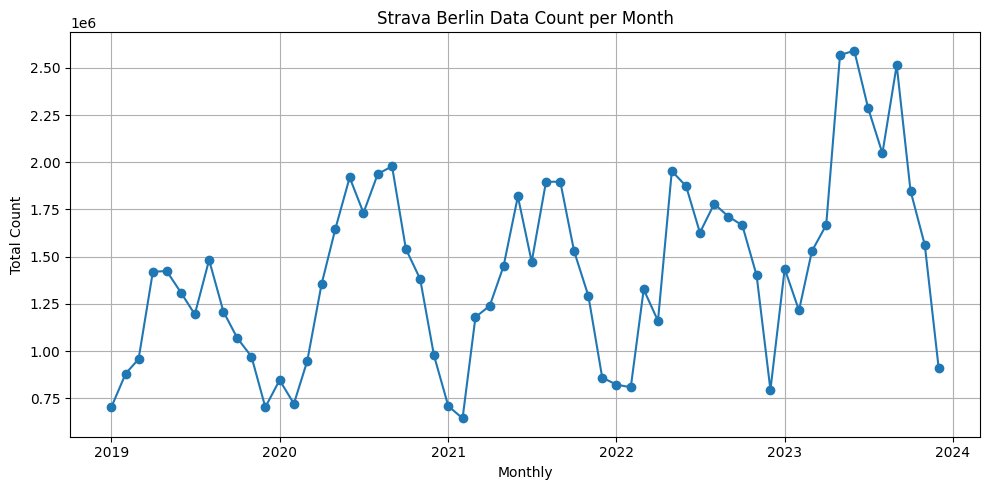

In [5]:
def plot_time_aggregation(df, date_column, value_column, aggregation='monthly', title=None):
    """
    Plots aggregated counts over time.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input DataFrame containing a date column and value column.
    date_column : str
        Name of the column with date or datetime values.
    value_column : str
        Name of the column to aggregate (e.g., 'count').
    aggregation : str, optional
        Aggregation level: 'daily', 'monthly', or 'yearly'. Default is 'monthly'.
    title : str, optional
        Custom plot title. If None, a default title is generated.
    """
    
    # Ensure date column is datetime
    df = df.copy()
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    
    # Choose period based on aggregation
    if aggregation == 'daily':
        df['period'] = df[date_column].dt.to_period('D')
    elif aggregation == 'monthly':
        df['period'] = df[date_column].dt.to_period('M')
    elif aggregation == 'yearly':
        df['period'] = df[date_column].dt.to_period('Y')
    else:
        raise ValueError("aggregation must be one of: 'daily', 'monthly', 'yearly'")
    
    # Aggregate
    agg_df = (
        df.groupby('period')[value_column]
        .sum()
        .reset_index()
    )
    agg_df['period'] = agg_df['period'].dt.to_timestamp()
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(agg_df['period'], agg_df[value_column], marker='o')
    plt.title(title or f'{value_column.title()} per {aggregation.capitalize()}')
    plt.xlabel(aggregation.capitalize())
    plt.ylabel(f'Total {value_column.title()}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_time_aggregation(berlin_data, 'date', 'count', aggregation='monthly', title='Strava Berlin Data Count per Month')

### Counting Stations, 2019 and 2022 only (not used now)

https://zenodo.org/records/14499984



In [6]:
# name = "prepared_working_data_for_analysis_dailyallday"
# path = os.path.join(base_path, f"{name}.csv")
# counting_stationas_dailyallday= pd.read_csv(f"data/counting_stations/{name}.csv")
# print(f"✅ Loaded {name}: shape = {counting_stationas_dailyallday.shape}")
# 
# name = "prepared_working_data_for_analysis_daily719"
# path = os.path.join(base_path, f"{name}.csv")
# counting_stationas_daily719= pd.read_csv(f"data/counting_stations/{name}.csv")
# print(f"✅ Loaded {name}: shape = {counting_stationas_daily719.shape}")


 # Official bike counting statistics

In [7]:
# -----------------------------------------------------------
# Load Excel file containing yearly counting station data
# -----------------------------------------------------------
path = "data/counting_stations/gesamtdatei-stundenwerte.xlsx"
xls = pd.ExcelFile(path)

# -----------------------------------------------------------
# Load station metadata (location, installation date, etc.)
# -----------------------------------------------------------
counting_stations_location = pd.read_excel(xls, sheet_name='Standortdaten')

# Rename columns to standardized English names
counting_stations_location = counting_stations_location.rename(columns={
    "Zählstelle": "station_id",
    "Beschreibung - Fahrtrichtung": "description",
    "Breitengrad": "lat",
    "Längengrad": "lon",
    "Installationsdatum": "installed"
})

# -----------------------------------------------------------
# Select the sheets corresponding to years 2019–2023
# Sheet names follow the pattern: "Jahresdatei <year>"
# -----------------------------------------------------------
target_sheets = [
    s for s in xls.sheet_names
    if s.startswith("Jahresdatei")
    and 2019 <= int(s.split()[-1]) <= 2023
]

counting_stations = []

# -----------------------------------------------------------
# Load and clean each yearly sheet
# -----------------------------------------------------------
for sheet in target_sheets:
    year = int(sheet.split()[-1])
    print(f"Reading {sheet}...")

    # Read entire sheet as strings (German locale issues → clean later)
    df = pd.read_excel(
        xls,
        sheet_name=sheet,
        skiprows=0,   # No extra header rows in this dataset
        dtype=str
    )

    # -------------------------------------------------------
    # Clean and convert column types
    # -------------------------------------------------------

    # Convert hourly count ("Wert") to float (German → international format)
    if "Wert" in df.columns:
        df["Wert"] = (
            df["Wert"]
            .str.replace(",", ".", regex=False)
            .astype(float)
        )
    
    # Convert hour column ("Stunde") to integer
    if "Stunde" in df.columns:
        df["Stunde"] = df["Stunde"].astype(int)
    
    # Convert date column ("Datum") to datetime
    if "Datum" in df.columns:
        df["Datum"] = pd.to_datetime(df["Datum"], errors="coerce")
    
    # Create full datetime (date + hour)
    if "Datum" in df.columns and "Stunde" in df.columns:
        df["datetime"] = df["Datum"] + pd.to_timedelta(df["Stunde"], unit="h")

    # Add year extracted from sheet name
    df["year"] = year

    counting_stations.append(df)

# -----------------------------------------------------------
# Combine all yearly sheets into a single unified DataFrame
# -----------------------------------------------------------
counting_stations = pd.concat(counting_stations, ignore_index=True)
counting_stations = counting_stations.rename(columns={
    "Zählstelle        Inbetriebnahme": "datetime"
})

print("Shape:", counting_stations.shape)
counting_stations.head()
counting_stations.info()


Reading Jahresdatei 2019...
Reading Jahresdatei 2020...
Reading Jahresdatei 2021...
Reading Jahresdatei 2022...
Reading Jahresdatei 2023...
Shape: (43823, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43823 entries, 0 to 43822
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   datetime                 43823 non-null  object
 1   02-MI-JAN-N 01.04.2015   43817 non-null  object
 2   02-MI-JAN-S 01.04.2015   43817 non-null  object
 3   03-MI-SAN-O 01.06.2015   43788 non-null  object
 4   03-MI-SAN-W 01.06.2015   43809 non-null  object
 5   05-FK-OBB-O 01.06.2015   31205 non-null  object
 6   05-FK-OBB-W 01.06.2015   31157 non-null  object
 7   06-FK-FRA-O 01.06.2016   43818 non-null  object
 8   06-FK-FRA-W 01.06.2016   43817 non-null  object
 9   10-PA-BER-N 01.05.2016   43817 non-null  object
 10  10-PA-BER-S 01.05.2016   43816 non-null  object
 11  12-PA-SCH 01.03.2012     43818 non-nul

# Accidents

In [8]:
csv_dir = Path("data/csv")
csv_files = sorted(csv_dir.glob("*.csv"))

if not csv_files:
    raise FileNotFoundError(f"No CSV files found in {csv_dir.resolve()}")

dfs = []
for fp in csv_files:
    df = pd.read_csv(fp, low_memory=False, delimiter=";")
    df["source_file"] = fp.name 
    dfs.append(df)

accidents = pd.concat(dfs, ignore_index=True)
print(f"Loaded {len(csv_files)} files -> combined shape: {accidents.shape}")

#print all column names
print("Columns:", accidents.columns.tolist())

accidents.head()

Loaded 9 files -> combined shape: (2098019, 35)
Columns: ['OBJECTID', 'UIDENTSTLA', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE', 'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART', 'UTYP1', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad', 'IstSonstig', 'LICHT', 'STRZUSTAND', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84', 'source_file', 'OBJECTID_1', 'ULICHTVERH', 'IstGkfz', 'IstSonstige', 'UIDENTSTLAE', 'IstStrassenzustand', 'OID_', 'PLST', 'FID', 'IstStrasse']


OBJECTID            UIDENTSTLA  ULAND  UREGBEZ  UKREIS  UGEMEINDE  UJAHR  \
0       1.0  01170113152013852017      1        0      55         12   2017   
1       2.0  01170113171013912017      1        0      60         53   2017   
2       3.0  01170106105132242017      1        0      61         11   2017   
3       4.0  01170114152013542018      1        0      55         42   2017   
4       5.0  01170106161013732017      1        0      62         60   2017   

   UMONAT  USTUNDE  UWOCHENTAG  ...  OBJECTID_1  ULICHTVERH  IstGkfz  \
0       1        5           6  ...         NaN         NaN      NaN   
1       1        6           6  ...         NaN         NaN      NaN   
2       1       18           6  ...         NaN         NaN      NaN   
3       1       12           7  ...         NaN         NaN      NaN   
4       1        8           6  ...         NaN         NaN      NaN   

   IstSonstige  UIDENTSTLAE  IstStrassenzustand  OID_  PLST  FID  IstStrasse  
0          NaN          NaN                 NaN   NaN   NaN  NaN         NaN  
1          NaN          NaN                 NaN   NaN   NaN  NaN         NaN  
2          NaN          NaN                 NaN   NaN   NaN  NaN         NaN  
3          NaN          NaN                 NaN   NaN   NaN  NaN         NaN  
4          NaN          NaN                 NaN   NaN   NaN  NaN         NaN  

[5 rows x 35 columns]

# Column Translation Dictionary (German → English)

In [9]:
accident_columns_en = {
    # IDs & metadata
    "OBJECTID": "object_id",
    "OBJECTID_1": "object_id_alt",
    "OID_": "oid",
    "FID": "fid",
    "source_file": "source_file",

    # Unique accident identifiers
    "UIDENTSTLA": "accident_id",
    "UIDENTSTLAE": "accident_id_extended",

    # Administrative divisions
    "ULAND": "land_code",
    "UREGBEZ": "admin_region_code",
    "UKREIS": "district_code",
    "UGEMEINDE": "municipality_code",

    # Time
    "UJAHR": "year",
    "UMONAT": "month",
    "USTUNDE": "hour",
    "UWOCHENTAG": "weekday",

    # Accident classification
    "UKATEGORIE": "injury_severity",
    "UART": "accident_kind",
    "UTYP1": "accident_type",

    # Participants involved (0 or 1)
    "IstRad": "involved_bicycle",
    "IstPKW": "involved_passenger_car",
    "IstFuss": "involved_pedestrian",
    "IstKrad": "involved_motorcycle",
    "IstSonstig": "involved_other_vehicle_old",     # older variant
    "IstGkfz": "involved_goods_vehicle",
    "IstSonstige": "involved_other_vehicle",
    "IstStrasse": "involved_road",
    "IstStrassenzustand": "road_condition_flag",

    # Environmental conditions
    "LICHT": "light_condition_old",
    "ULICHTVERH": "light_condition",                # official variable
    "STRZUSTAND": "road_condition",

    # Coordinates
    "LINREFX": "x_utm32",
    "LINREFY": "y_utm32",
    "XGCSWGS84": "longitude_wgs84",
    "YGCSWGS84": "latitude_wgs84",

    # Data quality
    "PLST": "plausibility_level",
}

accidents = accidents.rename(columns=accident_columns_en)

display(accidents.describe())
accidents.head()

object_id     land_code  admin_region_code  district_code  \
count  1.109758e+06  2.098019e+06       2.098019e+06   2.098019e+06   
mean   1.151476e+05  7.403401e+00       2.796094e+00   4.198891e+01   
std    7.033708e+04  3.604517e+00       2.380742e+00   2.593190e+01   
min    1.000000e+00  1.000000e+00       0.000000e+00   1.000000e+00   
25%    5.548825e+04  5.000000e+00       1.000000e+00   1.500000e+01   
50%    1.109760e+05  8.000000e+00       3.000000e+00   4.000000e+01   
75%    1.701620e+05  9.000000e+00       4.000000e+00   6.300000e+01   
max    2.683700e+05  1.600000e+01       9.000000e+00   9.100000e+01   

       municipality_code          year         month          hour  \
count       2.098019e+06  2.098019e+06  2.098019e+06  2.098019e+06   
mean        6.792577e+01  2.020357e+03  6.754927e+00  1.333360e+01   
std         1.106059e+02  2.490690e+00  3.203685e+00  4.788369e+00   
min         0.000000e+00  2.016000e+03  1.000000e+00  0.000000e+00   
25%         0.000000e+00  2.018000e+03  4.000000e+00  1.000000e+01   
50%         1.900000e+01  2.020000e+03  7.000000e+00  1.400000e+01   
75%         1.110000e+02  2.023000e+03  9.000000e+00  1.700000e+01   
max         7.180000e+02  2.024000e+03  1.200000e+01  2.300000e+01   

            weekday  injury_severity  ...  road_condition  object_id_alt  \
count  2.098019e+06     2.098019e+06  ...   913461.000000  211868.000000   
mean   4.099909e+00     2.800768e+00  ...        0.274373  105934.500000   
std    1.873301e+00     4.232954e-01  ...        0.489921   61161.167754   
min    1.000000e+00     1.000000e+00  ...        0.000000       1.000000   
25%    3.000000e+00     3.000000e+00  ...        0.000000   52967.750000   
50%    4.000000e+00     3.000000e+00  ...        0.000000  105934.500000   
75%    6.000000e+00     3.000000e+00  ...        1.000000  158901.250000   
max    7.000000e+00     3.000000e+00  ...        2.000000  211868.000000   

       light_condition  involved_goods_vehicle  involved_other_vehicle  \
count     1.902790e+06            1.902790e+06            1.539249e+06   
mean      4.315043e-01            4.725167e-02            1.158890e-01   
std       7.894835e-01            2.121767e-01            3.200919e-01   
min       0.000000e+00            0.000000e+00            0.000000e+00   
25%       0.000000e+00            0.000000e+00            0.000000e+00   
50%       0.000000e+00            0.000000e+00            0.000000e+00   
75%       0.000000e+00            0.000000e+00            0.000000e+00   
max       2.000000e+00            1.000000e+00            1.000000e+00   

       road_condition_flag            oid  plausibility_level            fid  \
count         1.032885e+06  776393.000000       537567.000000  151673.000000   
mean          2.805133e-01  129784.731659            1.024017   75836.000000   
std           4.959499e-01   75355.081951            0.153103   43784.368027   
min           0.000000e+00       1.000000            1.000000       0.000000   
25%           0.000000e+00   64700.000000            1.000000   37918.000000   
50%           0.000000e+00  129399.000000            1.000000   75836.000000   
75%           1.000000e+00  194099.000000            1.000000  113754.000000   
max           2.000000e+00  269048.000000            2.000000  151672.000000   

       involved_road  
count  151673.000000  
mean        0.298372  
std         0.510183  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         2.000000  

[8 rows x 28 columns]

object_id           accident_id  land_code  admin_region_code  \
0        1.0  01170113152013852017          1                  0   
1        2.0  01170113171013912017          1                  0   
2        3.0  01170106105132242017          1                  0   
3        4.0  01170114152013542018          1                  0   
4        5.0  01170106161013732017          1                  0   

   district_code  municipality_code  year  month  hour  weekday  ...  \
0             55                 12  2017      1     5        6  ...   
1             60                 53  2017      1     6        6  ...   
2             61                 11  2017      1    18        6  ...   
3             55                 42  2017      1    12        7  ...   
4             62                 60  2017      1     8        6  ...   

   object_id_alt  light_condition  involved_goods_vehicle  \
0            NaN              NaN                     NaN   
1            NaN              NaN                     NaN   
2            NaN              NaN                     NaN   
3            NaN              NaN                     NaN   
4            NaN              NaN                     NaN   

   involved_other_vehicle  accident_id_extended  road_condition_flag  oid  \
0                     NaN                   NaN                  NaN  NaN   
1                     NaN                   NaN                  NaN  NaN   
2                     NaN                   NaN                  NaN  NaN   
3                     NaN                   NaN                  NaN  NaN   
4                     NaN                   NaN                  NaN  NaN   

   plausibility_level  fid  involved_road  
0                 NaN  NaN            NaN  
1                 NaN  NaN            NaN  
2                 NaN  NaN            NaN  
3                 NaN  NaN            NaN  
4                 NaN  NaN            NaN  

[5 rows x 35 columns]

In [10]:
accidents[['year', 'month', 'hour', 'weekday']].nunique()

year        9
month      12
hour       24
weekday     7
dtype: int64

In [11]:
# drop all accidents that did not involve bicycles (column 'IstRad' != 1)
accidents_bike_berlin = accidents[accidents['involved_bicycle'] == 1].copy()
print(f"Filtered to bicycle accidents -> shape: {accidents_bike_berlin.shape}")

# only keep accidents in Berlin (column 'ULAND' == 11)
accidents_bike_berlin = accidents_bike_berlin[accidents_bike_berlin['land_code'] == 11].copy()
print(f"Filtered to bicycle accidents in Berlin -> shape: {accidents_bike_berlin.shape}")
accidents_bike_berlin.head()

Filtered to bicycle accidents -> shape: (626844, 35)
Filtered to bicycle accidents in Berlin -> shape: (33181, 35)


object_id accident_id  land_code  admin_region_code  district_code  \
307975        NaN         NaN         11                  0              3   
308120        NaN         NaN         11                  0              3   
308130        NaN         NaN         11                  0              2   
308149        NaN         NaN         11                  0              1   
308175        NaN         NaN         11                  0              9   

        municipality_code  year  month  hour  weekday  ...  object_id_alt  \
307975                  3  2018      1    15        4  ...       112747.0   
308120                  3  2018      1    11        5  ...       112892.0   
308130                  2  2018      1     8        2  ...       112902.0   
308149                  1  2018      1    19        4  ...       112921.0   
308175                  9  2018      1    18        4  ...       112947.0   

        light_condition  involved_goods_vehicle  involved_other_vehicle  \
307975              1.0                     0.0                     NaN   
308120              0.0                     0.0                     NaN   
308130              0.0                     0.0                     NaN   
308149              2.0                     0.0                     NaN   
308175              2.0                     0.0                     NaN   

        accident_id_extended  road_condition_flag  oid  plausibility_level  \
307975                   NaN                  NaN  NaN                 NaN   
308120                   NaN                  NaN  NaN                 NaN   
308130                   NaN                  NaN  NaN                 NaN   
308149                   NaN                  NaN  NaN                 NaN   
308175                   NaN                  NaN  NaN                 NaN   

        fid  involved_road  
307975  NaN            NaN  
308120  NaN            NaN  
308130  NaN            NaN  
308149  NaN            NaN  
308175  NaN            NaN  

[5 rows x 35 columns]

In [56]:
import folium
import geopandas as gpd
from shapely.geometry import Point
import json
from folium.plugins import HeatMap

# ---------------------------------------------------
# Clean accident coordinates
# ---------------------------------------------------
accidents_bike_berlin["longitude_wgs84"] = (
    accidents_bike_berlin["longitude_wgs84"]
    .astype(str).str.replace(",", ".", regex=False).astype(float)
)

accidents_bike_berlin["latitude_wgs84"] = (
    accidents_bike_berlin["latitude_wgs84"]
    .astype(str).str.replace(",", ".", regex=False).astype(float)
)


# --- accidents GeoDataFrame ---
gdf_acc = gpd.GeoDataFrame(
    accidents_bike_berlin,
    geometry=gpd.points_from_xy(
        accidents_bike_berlin["longitude_wgs84"],
        accidents_bike_berlin["latitude_wgs84"]
    ),
    crs="EPSG:4326"
)

# --- buffer around accident points: 10 meters ---
gdf_acc_buffer = gdf_acc.to_crs(3857).buffer(10).to_crs(4326)

# --- Select street segments that intersect any accident ---
gdf_accident_streets = gdf_streets[
    gdf_streets.intersects(gdf_acc_buffer.unary_union)
]


# --- Создаём карту ---
m = folium.Map(location=[52.52, 13.405], zoom_start=12, tiles="cartodbpositron")

# =====================================================
# === 1. BLUE: Bike Network (all streets)
# =====================================================
layer_streets = folium.FeatureGroup("Bike Network from Strava data (Blue)", show=True)

folium.GeoJson(
    json.loads(gdf_streets.to_json()),
    style_function=lambda x: {
        "color": "blue",
        "weight": 3,
        "opacity": 0.5
    }
).add_to(layer_streets)

m.add_child(layer_streets)

# =====================================================
# === 2. RED: Accident Streets (streets with accidents)
# =====================================================
layer_acc_streets = folium.FeatureGroup("Accident Street Segments (Red)", show=True)

folium.GeoJson(
    json.loads(gdf_accident_streets.to_json()),
    style_function=lambda x: {
        "color": "red",
        "weight": 1,
        "opacity": 0.9
    }   
).add_to(layer_acc_streets)

m.add_child(layer_acc_streets)

# ================================================================
# === OPTIONAL: HeatMap for accidents (toggle separately) ===
# ================================================================

acc_points = accidents_bike_berlin[["latitude_wgs84", "longitude_wgs84"]].dropna().values.tolist()

heat_layer = folium.FeatureGroup(name="Accident Heatmap", show=False)

HeatMap(
    acc_points,
    radius=10,
    blur=12,
    max_zoom=14,
    min_opacity=0.3
).add_to(heat_layer)

m.add_child(heat_layer)

# =====================================================
# === Layer control
# =====================================================
folium.LayerControl().add_to(m)

# Save
m.save("berlin_accident_vs_network_lines.html")
m


/var/folders/v0/vr_3rk6x4_5816c2kvvz854w0000gn/T/ipykernel_1432/3058776826.py:36: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_streets.intersects(gdf_acc_buffer.unary_union)


## How many accidents we can attribute to Berlin bike network from Strava data?

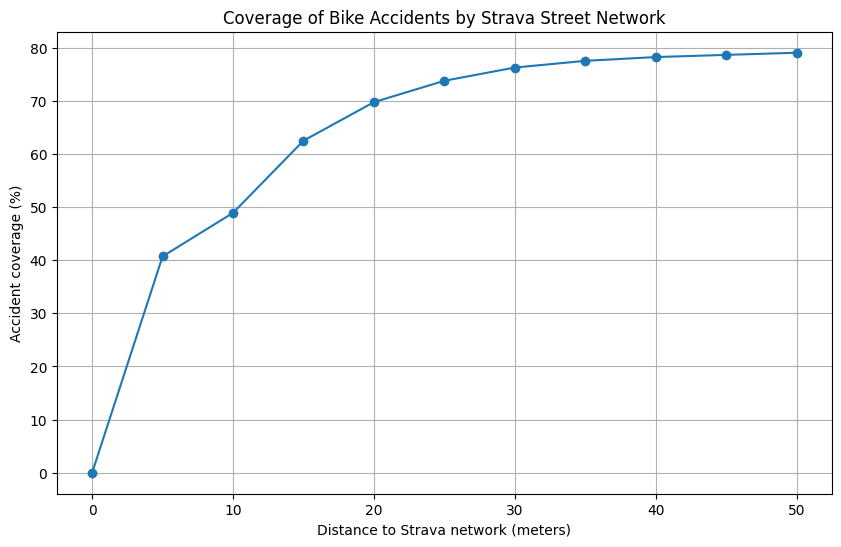

    buffer_m  coverage_percent
0          0          0.000000
1          5         40.721974
2         10         48.922136
3         15         62.507121
4         20         69.765838
5         25         73.786466
6         30         76.277996
7         35         77.537253
8         40         78.250832
9         45         78.658591
10        50         79.066351


In [54]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
import pandas as pd

# ---------------------------------------------------
# 1. Prepare streets in EPSG:3857
# ---------------------------------------------------
try:
    gdf_streets
except NameError:
    gdf_streets = berlin_graph_geometry.copy()
    gdf_streets["geometry"] = gdf_streets["geometry"].apply(wkt.loads)
    gdf_streets = gdf_streets.set_geometry("geometry").set_crs(4326)

gdf_streets_3857 = gdf_streets.to_crs(3857)

# ---------------------------------------------------
# 2. Prepare accidents
# ---------------------------------------------------
accidents_bike_berlin["longitude_wgs84"] = (
    accidents_bike_berlin["longitude_wgs84"].astype(str)
    .str.replace(",", ".", regex=False).astype(float)
)

accidents_bike_berlin["latitude_wgs84"] = (
    accidents_bike_berlin["latitude_wgs84"].astype(str)
    .str.replace(",", ".", regex=False).astype(float)
)

gdf_acc = gpd.GeoDataFrame(
    accidents_bike_berlin,
    geometry=gpd.points_from_xy(
        accidents_bike_berlin["longitude_wgs84"],
        accidents_bike_berlin["latitude_wgs84"]
    ),
    crs=4326
).to_crs(3857)

# ---------------------------------------------------
# 3. Fast nearest-distance computation
# ---------------------------------------------------
nearest = gpd.sjoin_nearest(
    gdf_acc,
    gdf_streets_3857[["geometry"]],
    how="left",
    distance_col="dist_to_street"
)

# ---------------------------------------------------
# 4. Compute coverage curve with 5m step
# ---------------------------------------------------
buffer_distances = list(range(0, 51, 5))
coverage_percentages = []

dist = nearest["dist_to_street"]

for d in buffer_distances:
    covered = (dist <= d).sum()
    percent = covered / len(dist) * 100
    coverage_percentages.append(percent)

# ---------------------------------------------------
# 5. Plot
# ---------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(buffer_distances, coverage_percentages, marker="o")
plt.xlabel("Distance to Strava network (meters)")
plt.ylabel("Accident coverage (%)")
plt.title("Coverage of Bike Accidents by Strava Street Network")
plt.grid(True)
plt.show()

# ---------------------------------------------------
# 6. Table
# ---------------------------------------------------
coverage_df = pd.DataFrame({
    "buffer_m": buffer_distances,
    "coverage_percent": coverage_percentages
})
print(coverage_df)


# How match counting stations to Strava network? 

Merged shape: (1826, 3)
        date  strava_count  stations_count
0 2019-01-01        4717.0          8100.0
1 2019-01-02       18877.0         24817.0
2 2019-01-03       22089.0         29203.0
3 2019-01-04       19915.0         26626.0
4 2019-01-05       14345.0         20072.0


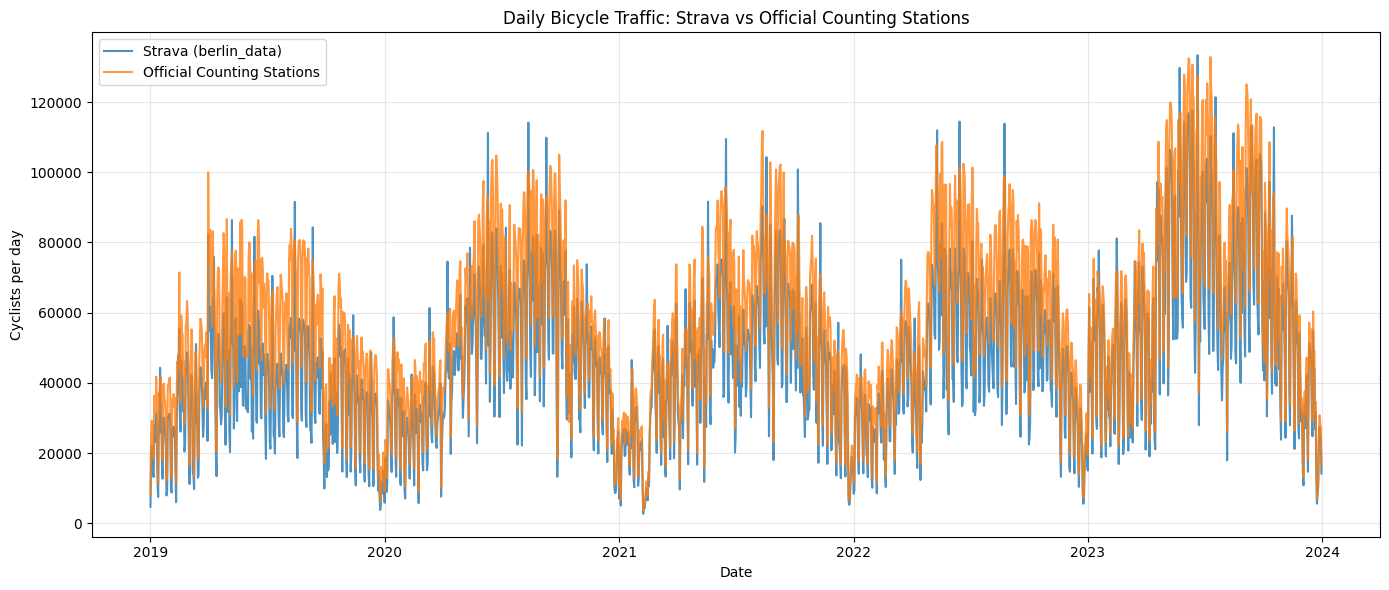

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# OFFICIAL COUNTING STATIONS — DAILY AGGREGATION
# ---------------------------------------------------------

# Convert datetime column to pandas datetime
counting_stations["datetime"] = pd.to_datetime(
    counting_stations["datetime"], errors="coerce"
)

# Extract date (YYYY-MM-DD)
counting_stations["date"] = counting_stations["datetime"].dt.date

# Identify station columns (everything except datetime/date/year)
station_cols = [
    col for col in counting_stations.columns
    if col not in ["datetime", "date", "year"]
]
# Convert station columns to numeric (German → float)
counting_stations[station_cols] = counting_stations[station_cols].apply(
    lambda col: (
        col.astype(str)
           .str.replace(",", ".", regex=False)
           .replace(["nan", ""], None)
           .astype(float)
    )
)

# Sum across all stations per day
official_daily = (
    counting_stations.groupby("date")[station_cols]
    .sum()            # sum across stations
    .sum(axis=1)      # sum across columns → single daily total
    .reset_index(name="stations_count")
)

# Convert back to datetime for plotting
official_daily["date"] = pd.to_datetime(official_daily["date"])


# ---------------------------------------------------------
# STRAVA DATA — DAILY AGGREGATION
# ---------------------------------------------------------

strava_daily = (
    berlin_data.groupby("date")["count"]
    .sum()
    .reset_index()
    .rename(columns={"count": "strava_count"})
)

strava_daily["date"] = pd.to_datetime(strava_daily["date"])


# ---------------------------------------------------------
# MERGE BOTH SOURCES ON DATE
# ---------------------------------------------------------

combined = pd.merge(strava_daily, official_daily, on="date", how="inner")
combined = combined.sort_values("date")

print("Merged shape:", combined.shape)
print(combined.head())


# ---------------------------------------------------------
# PLOT — DAILY BICYCLE TRAFFIC
# ---------------------------------------------------------

plt.figure(figsize=(14, 6))

plt.plot(
    combined["date"],
    combined["strava_count"],
    label="Strava (berlin_data)",
    alpha=0.8
)

plt.plot(
    combined["date"],
    combined["stations_count"],
    label="Official Counting Stations",
    alpha=0.8
)

plt.title("Daily Bicycle Traffic: Strava vs Official Counting Stations")
plt.xlabel("Date")
plt.ylabel("Cyclists per day")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely import wkt

# =========================================================
# 1. LOAD & FIX STRAVA GEOMETRY (WKT → SHAPELY, SET CRS)
# =========================================================

gdf_strava = berlin_graph_geometry.copy()

# Convert WKT strings to real geometry objects
gdf_strava["geometry"] = gdf_strava["geometry"].apply(wkt.loads)

# Set geometry column
gdf_strava = gdf_strava.set_geometry("geometry")

# IMPORTANT: Assign CRS BEFORE any transformation (your data is WGS84 lat/lon)
gdf_strava = gdf_strava.set_crs(4326)    # <--- Set CRS exactly once

# Transform to metric CRS for distance measurement
gdf_strava = gdf_strava.to_crs(3857)


# =========================================================
# 2. LOAD COUNTING STATIONS & SET CRS
# =========================================================

gdf_stations = counting_stations_location.copy()

gdf_stations = gpd.GeoDataFrame(
    gdf_stations,
    geometry=gpd.points_from_xy(gdf_stations["lon"], gdf_stations["lat"]),
    crs="EPSG:4326"
)

# Also transform them to metric CRS
gdf_stations = gdf_stations.to_crs(3857)


# =========================================================
# 3. NEAREST-NEIGHBOR MATCH (NO SKLEARN NEEDED)
# =========================================================

matched = gdf_stations.sjoin_nearest(
    gdf_strava[["geometry", "counter_name"]],
    how="left",
    distance_col="distance_m"
)


# =========================================================
# 4. DIAGNOSTICS
# =========================================================
print("\nDistance diagnostics:")
print(matched["distance_m"].describe())
print("Total stations:", len(matched))
print("Stations with valid match:", matched["counter_name"].notna().sum())
print("Stations without match:", matched["counter_name"].isna().sum())


print("\n\nGood matches (< 30 m):", (matched["distance_m"] < 30).sum())
print("OK matches (30–80 m):", ((matched["distance_m"] >= 30) & (matched["distance_m"] < 80)).sum())
print("Potentially bad matches (> 80 m):", (matched["distance_m"] >= 80).sum())

print("\nUnique matched Strava segments:", matched["counter_name"].nunique())

dups = matched.groupby("counter_name")["station_id"].count().sort_values(ascending=False)
dups[dups > 1]




Distance diagnostics:
count     35.000000
mean      32.954413
std       88.171327
min        0.071621
25%       12.020629
50%       13.332459
75%       25.608075
max      533.793070
Name: distance_m, dtype: float64
Total stations: 35
Stations with valid match: 35
Stations without match: 0


Good matches (< 30 m): 28
OK matches (30–80 m): 6
Potentially bad matches (> 80 m): 1

Unique matched Strava segments: 25


counter_name
streetsegment_2258    3
streetsegment_2228    2
streetsegment_163     2
streetsegment_478     2
streetsegment_4706    2
streetsegment_374     2
streetsegment_492     2
streetsegment_3343    2
streetsegment_3287    2
Name: station_id, dtype: int64

In [24]:
matched

station_id               description        lat        lon  installed  \
0     12-PA-SCH            Schwedter Steg  52.549071  13.400367 2012-03-01   
1   02-MI-JAN-N      Jannowitzbrücke Nord  52.513932  13.417835 2015-04-01   
2   02-MI-JAN-S       Jannowitzbrücke Süd  52.513943  13.417611 2015-04-01   
3     13-CW-PRI       Prinzregentenstraße  52.488136  13.333120 2015-04-01   
4   18-TS-YOR-O           Yorckstraße Ost  52.491938  13.373472 2015-04-01   
5   18-TS-YOR-W           Yorkstraße West  52.492280  13.373210 2015-04-01   
6     19-TS-MON          Monumentenstraße  52.488117  13.369785 2015-05-01   
7     27-RE-MAR                Markstraße  52.558190  13.364944 2015-05-01   
8   03-MI-SAN-O       Invalidenstraße Ost  52.527177  13.372016 2015-06-01   
9   03-MI-SAN-W      Invalidenstraße West  52.527686  13.373105 2015-06-01   
10  05-FK-OBB-O        Oberbaumbrücke Ost  52.501199  13.445060 2015-06-01   
11  05-FK-OBB-W       Oberbaumbrücke West  52.501276  13.444867 2015-06-01   
12    26-LI-PUP    Paul-und-Paula-Uferweg  52.500323  13.474302 2015-06-01   
13    24-MH-ALB            Alberichstraße  52.492534  13.558493 2015-07-01   
14  10-PA-BER-N      Berliner Straße Nord  52.566924  13.412489 2016-05-01   
15  10-PA-BER-S       Berliner Straße Süd  52.566813  13.412166 2016-05-01   
16  15-SP-KLO-S         Klosterstraße Süd  52.533308  13.198488 2016-05-01   
17  15-SP-KLO-N        Klosterstraße Nord  52.533512  13.199053 2016-06-01   
18  17-SK-BRE-O      Breitenbachplatz Ost  52.466760  13.309165 2016-05-01   
19  17-SK-BRE-W     Breitenbachplatz West  52.467215  13.308360 2016-05-01   
20  20-TS-MAR-N    Mariendorfer Damm Nord  52.438535  13.387953 2016-05-01   
21  20-TS-MAR-S     Mariendorfer Damm Süd  52.438072  13.387812 2016-05-01   
22    21-NK-MAY               Maybachufer  52.492998  13.429682 2016-05-01   
23    23-TK-KAI                Kaisersteg  52.457270  13.518700 2016-05-01   
24  06-FK-FRA-O     Frankfurter Allee Ost  52.513584  13.474242 2016-06-01   
25  06-FK-FRA-W    Frankfurter Allee West  52.513790  13.474414 2016-06-01   
26   14-CW-JU-W  Straße des 17. Juni West  52.513133  13.326845 2021-07-27   
27   14-CW-JU-O   Straße des 17. Juni Ost  52.512590  13.326630 2021-07-27   
28   01-MI-AL-W           Karl-Marx-Allee  52.521907  13.417536 2021-12-16   
29   11-PA-SE-N     Senefelder Platz Nord  52.531380  13.412355 2022-10-06   
30     04-MI-NO                  Nordufer  52.513933  13.417864 2023-10-16   
31   16-SP-NO-O       Nonnendammallee Ost  52.537901  13.247914 2023-11-22   
32   16-SP-NO-W      Nonnendammallee West  52.538414  13.246996 2023-11-22   
33     07-FK-ST        Strausberger Platz  52.518941  13.426139 2024-04-22   
34   09-PA-SA-S         Schönhauser Allee  52.543044  13.412067 2024-04-22   

                           geometry  index_right        counter_name  \
0    POINT (1491722.013 6900019.97)         3169  streetsegment_3169   
1   POINT (1493666.516 6893589.794)         2258  streetsegment_2258   
2   POINT (1493641.632 6893591.776)         2258  streetsegment_2258   
3   POINT (1484236.119 6888872.462)         1913  streetsegment_1913   
4   POINT (1488728.123 6889567.616)         3287  streetsegment_3287   
5   POINT (1488698.927 6889630.151)         3287  streetsegment_3287   
6   POINT (1488317.658 6888869.065)         4631  streetsegment_4631   
7   POINT (1487778.705 6901689.529)         2630  streetsegment_2630   
8   POINT (1488565.999 6896012.889)         2228  streetsegment_2228   
9   POINT (1488687.224 6896106.047)         2228  streetsegment_2228   
10  POINT (1496697.287 6891260.955)         3343  streetsegment_3343   
11  POINT (1496675.789 6891274.988)         3343  streetsegment_3343   
12   POINT (1499952.47 6891100.862)         3588  streetsegment_3588   
13   POINT (1509324.537 6889676.59)         3572  streetsegment_3572   
14  POINT (1493071.487 6903288.855)          478   streetsegment_478   
15   POINT (1493035.544 6903268.57)         